In [1]:
pip install numpy tensorflow tensorflow_datasets matplotlib -q

In [3]:
import numpy as np 
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [4]:
dataset = tfds.load('beans', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteCAUASM/beans-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteCAUASM/beans-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteCAUASM/beans-test.tfrecord*...:   0%|          | 0/1…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [5]:
sample = dataset.as_numpy_iterator().next()

In [6]:
image = tf.cast(tf.image.resize(sample['image'], (200,200)), tf.int64)

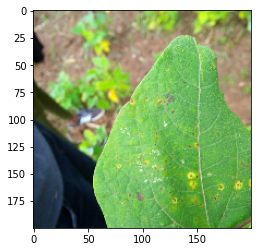

In [7]:
plt.imshow(image.numpy())

In [8]:
res = tf.image.extract_patches(np.expand_dims(sample['image'], 0), [1,20,20,1], [1,20,20,1], [1,1,1,1], padding='VALID')
res = tf.reshape(res, (1, -1, res.shape[-1]))

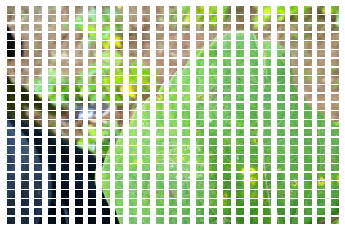

In [9]:
fig, ax = plt.subplots(nrows=25, ncols=25)
for idx, axes in enumerate(ax.flat): 
    axes.imshow(tf.reshape(res[0][idx], (20,20,3)))
    axes.axis('off')
plt.show()

In [10]:
def extract_patches(image_tf, patch_size=[], mode='valid'):
    patches = tf.image.extract_patches(image_tf,
                                    sizes=[1, patch_size[0], patch_size[1], 1],
                                    strides=[1, patch_size[0], patch_size[1], 1],
                                    rates=[1,1,1,1],
                                    padding=mode.upper())#['SAME', 'VALID']
    _, rows, cols, _ = patches.shape
    patches = tf.reshape(patches, shape=(-1, patch_size[0], patch_size[1], 3) )
    return patches, rows, cols

def inverse_grid(patches, rows, cols):
    # considering square patches
    image_tf = tf.split(patches, patches.shape[0])
    image_tf = tf.squeeze(tf.concat(image_tf, axis=2))
    image_tf = tf.concat(tf.split(image_tf, rows, axis=1), axis=0)
    image_tf = tf.expand_dims(image_tf, axis=0)
    return image_tf

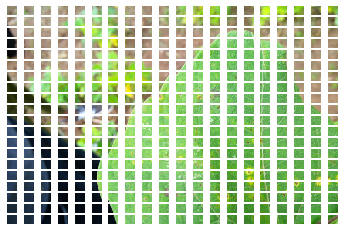

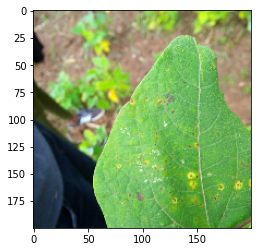

In [16]:
image_tf = tf.expand_dims(image, axis=0)
patches, rows, cols = extract_patches(image_tf, patch_size=[10,10])

# viz. patches
fig, ax = plt.subplots(nrows=rows, ncols=cols)
for idx, axes in enumerate(ax.flat):
    # axes.imshow(tf.reshape(res[0][idx], (20,20,3)))
    axes.imshow( patches[idx] )
    axes.axis('off')
plt.show()

# restore image from patches
restored_image = inverse_grid(patches, rows, cols)
plt.imshow(restored_image.numpy()[0])
plt.show()